In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv("E://nj_teachers_salaries_2016.csv")
print(df)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


          last_name      first_name    county  \
0           Heckman        William   Atlantic   
1              Bird          Kelly   Atlantic   
2              Bean         David B  Atlantic   
3             Campo      Paula Mia   Atlantic   
4       Adams-meyer         Della L  Atlantic   
5            Mansor        Theresa   Atlantic   
6            Mendez         Cheryl   Atlantic   
7            Toland           John   Atlantic   
8             Dever          Paula   Atlantic   
9             Smith      Brittany M  Atlantic   
10            Perez         Evelyn   Atlantic   
11            Perez          Adhan   Atlantic   
12           Aikens       Crystal A  Atlantic   
13            Daley       Beth Ann   Atlantic   
14          Chapman         Ericka   Atlantic   
15           Freund        Matthew   Atlantic   
16           Powell          Gavin   Atlantic   
17             Gray     Antoinette   Atlantic   
18        Rosenberg          Susan   Atlantic   
19             Ward 

In [2]:
df.isnull().sum()

last_name                0
first_name               0
county                   0
district                 0
school                   0
primary_job              0
fte                     79
salary                   0
certificate              2
subcategory              0
teaching_route           0
highly_qualified         0
experience_district    529
experience_nj          658
experience_total       669
dtype: int64

In [3]:
df['fte'].fillna(df['fte'].mean(), inplace=True)
df['experience_district'].fillna(df['experience_district'].mean(), inplace=True) 
df['experience_nj'].fillna(df['experience_nj'].mean(), inplace=True) 
df['experience_total'].fillna(df['experience_total'].mean(), inplace=True) 

In [4]:
df.corr()

,fte,salary,highly_qualified,experience_district,experience_nj,experience_total
fte,1.000000,0.102119,0.021148,0.025870,0.004743,0.003972
salary,0.102119,1.000000,-0.256778,0.563771,0.605548,0.607231
highly_qualified,0.021148,-0.256778,1.000000,-0.070555,-0.107092,-0.111296
experience_district,0.025870,0.563771,-0.070555,1.000000,0.921397,0.903494
experience_nj,0.004743,0.605548,-0.107092,0.921397,1.000000,0.981901
experience_total,0.003972,0.607231,-0.111296,0.903494,0.981901,1.000000


In [5]:
print(df)

          last_name      first_name    county  \
0           Heckman        William   Atlantic   
1              Bird          Kelly   Atlantic   
2              Bean         David B  Atlantic   
3             Campo      Paula Mia   Atlantic   
4       Adams-meyer         Della L  Atlantic   
5            Mansor        Theresa   Atlantic   
6            Mendez         Cheryl   Atlantic   
7            Toland           John   Atlantic   
8             Dever          Paula   Atlantic   
9             Smith      Brittany M  Atlantic   
10            Perez         Evelyn   Atlantic   
11            Perez          Adhan   Atlantic   
12           Aikens       Crystal A  Atlantic   
13            Daley       Beth Ann   Atlantic   
14          Chapman         Ericka   Atlantic   
15           Freund        Matthew   Atlantic   
16           Powell          Gavin   Atlantic   
17             Gray     Antoinette   Atlantic   
18        Rosenberg          Susan   Atlantic   
19             Ward 

In [6]:
df.head()

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
0,Heckman,William,Atlantic,Atlantic City,Pennsylvania Ave School,Mathematics Grades 5 - 8,1.0,98774,Standard certificate,1,1,0,13.0,13.0,13.0
1,Bird,Kelly,Atlantic,Atlantic City,Atlantic City High School,Coordinator Substance Abuse,1.0,118415,Standard certificate,1,1,0,16.0,16.0,16.0
2,Bean,David B,Atlantic,Atlantic City,Atlantic City High School,Health & Physical Education,0.8,98774,Standard certificate,1,1,0,13.0,13.0,15.0
3,Campo,Paula Mia,Atlantic,Atlantic City,Atlantic City High School,Resource Program In-class,1.0,66184,Standard certificate,0,0,0,16.0,16.0,16.0
4,Adams-meyer,Della L,Atlantic,Atlantic City,Atlantic City High School,School Psychologist,1.0,101866,Standard certificate,1,1,0,12.0,12.0,12.0


In [9]:

X = df[["experience_total","salary"]]


y = df[["highly_qualified"]]


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[ 1.1465755] [[  3.23556876e-03  -5.31541966e-06]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       highly_qualified   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.402e+05
Date:                Sat, 24 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:40:45   Log-Likelihood:            -1.0401e+05
No. Observations:              138715   AIC:                         2.080e+05
Df Residuals:                  138713   BIC:                         2.080e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
experience_total    -0.0069      0.000    -36.333      0.000      -0.007      -0.007
salary            1.056e-05    3.7e-08    285.555      0.000    1.05e-05    1.06e-05
==============================================================================
Omnibus:                    28977.866   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50816.934
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                       3.966   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
from collections import Counter
import random
import sklearn 

from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale 
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

from scipy import stats

import statistics
from sklearn import linear_model
import statsmodels.api as sm


In [10]:
#predicting without splitting
ypred=results.predict()
print(ypred)

[ 0.95285608  1.13945415  0.93899832 ...,  0.56126904  0.76914536
  0.44083095]


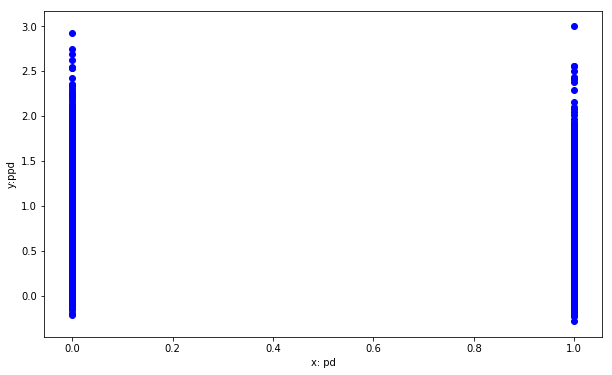

In [11]:

plt.scatter(y, ypred , color='blue')
plt.xlabel("x: pd")
plt.ylabel("y:ppd")
plt.show()

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as s
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold


#Calculating the root mean squared error of the fit regression line based on independent variables 
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)

0.51215245328


In [13]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean

highly_qualified    0.646241
dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [15]:
reg_all.score(X_test, y_test)

0.070486066750606202

In [16]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not.
indep=['salary','experience_total']
X=df[indep] 

thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

In [25]:
X = df[["salary","experience_total"]]


y = df[["highly_qualified"]]


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[ 1.1465755] [[ -5.31541966e-06   3.23556876e-03]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       highly_qualified   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.402e+05
Date:                Sat, 24 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:43:26   Log-Likelihood:            -1.0401e+05
No. Observations:              138715   AIC:                         2.080e+05
Df Residuals:                  138713   BIC:                         2.080e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
salary            1.056e-05    3.7e-08    285.555      0.000    1.05e-05    1.06e-05
experience_total    -0.0069      0.000    -36.333      0.000      -0.007      -0.007
==============================================================================
Omnibus:                    28977.866   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50816.934
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                       3.966   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:

model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,y_test))
print(results.score(X_train,y_train))

0.0704860667506
0.0684759080348


In [ ]:
X = df[["salary"]]
y = df[["experience_total"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

In [19]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       highly_qualified   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.402e+05
Date:                Sat, 24 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:42:54   Log-Likelihood:            -1.0401e+05
No. Observations:              138715   AIC:                         2.080e+05
Df Residuals:                  138713   BIC:                         2.080e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
salary            1.056e-05    3.7e-08    285.555      0.000    1.05e-05    1.06e-05
experience_total    -0.0069      0.000    -36.333      0.000      -0.007      -0.007
==============================================================================
Omnibus:                    28977.866   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50816.934
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                       3.966   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

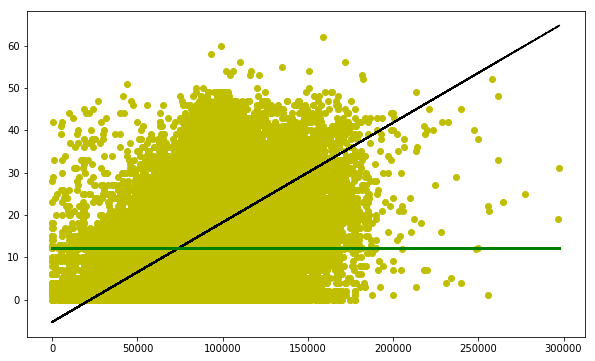

In [20]:
n=555
X = df["salary"]
y = df["experience_total"]
fit= np.polyfit(X, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')
x2 = np.linspace(np.amin(X),np.amax(X),n)
y2 = np.ones(n)*np.mean(y)
plt.plot(x2, y2, lw=3, color="g")
plt.show()

In [21]:

print(pred_train)

[[ 0.79948572]
 [ 0.72575606]
 [ 0.83578548]
 ..., 
 [ 0.84080851]
 [ 0.82443751]
 [ 0.78382395]]


In [22]:

print(pred_test)


[[ 0.83553343]
 [ 0.68353724]
 [ 0.86255486]
 ..., 
 [ 0.88156845]
 [ 0.53936905]
 [ 0.75954117]]


In [23]:
rmsetrain = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(rmsetest)
#Even the rmse's do not vary much

0.390946542258
0.391960912045


In [26]:
#Cross validation
#R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
# represent the model's ability to generalize. For this we perform cross validation.

reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[ 0.05728469  0.07153363  0.05275419  0.09389882  0.05495548]
0.066085360712
0.0153773764771


In [27]:
#Lasso Regularization
lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[ -4.84028683e-06   1.21718855e-03]


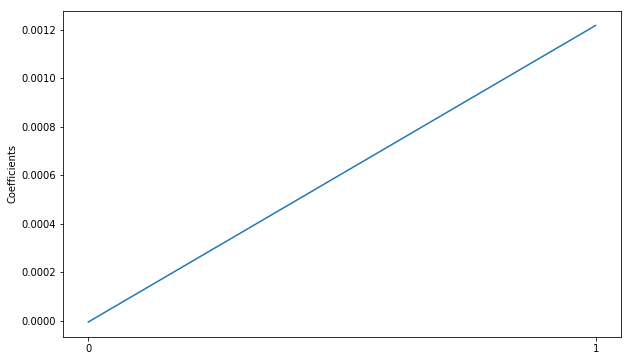

In [28]:
_ =plt.plot(range(len(X.T)),lasso_coef)
_ =plt.xticks(range(len(X.T)), X.T)
_ =plt.ylabel('Coefficients')
plt.show()

### 